# Promoter Similarity Between Species  

Here, we make an effort to understand why certain promoters show high probabilities of being classified as more than one species. The following are possible approaches we can take to address this problem...  

Using Model Prediction Probabilities  
1) get probability values from model output and identify promoters whose outputs have 2+ high probability values  
2) perform GSEA on identified promoteres  

Using Representation Space  
1) get representation layers for all promoters  
2) use PCA or tSNE to get projections of the representations for each promoter  
3) use Gaussian mixture models to determine genes w/ high probabilities of belonging to 2+ clusters  

## Mouse and Human Promoters

In [1]:
execfile('analysis.py')
execfile('plots.py')

Using TensorFlow backend.


In [ ]:
model_name = 'Mouse_Human_dense_model' # model is densely connected network
model_dir = 'results/Mouse_Human/'
testdata_file = 'data/h5datasets/Mouse_Human/all.h5'

# get representations for all genes and write to file
get_representations(model_name,model_dir,testdata_file,write2file=True)

# get predictions for all genes
getPredictions(model_name,model_dir,testdata_file,['Mouse','Human'])

In [2]:
# project representations onto PCs and write projections to file
representation_file = 'results/Mouse_Human/Mouse_Human_dense_allgenes_rep.txt'
output_file = 'results/Mouse_Human/Mouse_Human_dense_allgenes_repPCA.txt'
write_projection(representation_file,output_file,method='PCA')

In [ ]:
# project representations onto tSNE dimensions and write projections to file
representation_file = 'results/Mouse_Human/Mouse_Human_dense_allgenes_rep.txt'
output_file = 'results/Mouse_Human/Mouse_Human_dense_allgenes_reptSNE.txt'
write_projection(representation_file,output_file,method='tSNE')

### Neural Network Prediction Analysis

In [ ]:
model_name = 'Mouse_Human_dense_model' # model is densely connected network
model_dir = 'results/Mouse_Human/'
testdata_file = 'data/h5datasets/Mouse_Human/all.h5'
label_names = ['Mouse','Human']

# get predictions for all genes and write predictions to file
getPredictions(model_name,model_dir,testdata_file,label_names,write2file=True)

In [1]:
execfile('analysis.py')
species_list = ['Mouse','Human']
predProb_file = 'results/clustering/pred_probs/Mouse_Human_dense_model_predProbs.txt'
h5_file = 'data/h5datasets/Mouse_Human/all.h5'
genes_dict = getUncertainPredictions(predProb_file,h5_file,species_list,prob_threshold=0.45)

Using TensorFlow backend.


In [2]:
# write "uncertain" Mouse genes to file 
f = open('Mouse_Human_uncertainMouse.txt','w')
for gene in genes_dict['Mouse']:
    f.write(str(gene) + '\n')
f.close()

# write "uncertain" Human genes to file 
f = open('Mouse_Human_uncertainHuman.txt','w')
for gene in genes_dict['Human']:
    f.write(str(gene) + '\n')
f.close()

#### Gene Set Enrichment Analysis - Uncertain Predictions (Threshold: 45%) 

Tool: PantherDB (from Gene Ontology website)  
Annotation Dataset: GO biological processes  

**Human:** enrichment for...nothing...  

**Mouse:** enrichment for...  
- response to oxygen-containing compound (244 vs. 175.76, expected | p-value: 2.10e-03)  
- establishment of protein localization (240 vs. 176.87, expected | p-value: 1.38e-02)  
- cellular response to stress (265 vs. 196.69, expected | 6.55e-03)  
... (skip to interesting ones) 
- regulation of multicellular organismal process
- regulation of developmental process 
- animal organ development  
(see results/clustering/GSEA for more enriched terms)  

In [1]:
execfile('analysis.py')
species_list = ['Mouse','Human']
predProb_file = 'results/clustering/pred_probs/Mouse_Human_dense_model_predProbs.txt'
h5_file = 'data/h5datasets/Mouse_Human/all.h5'
genes_dict = getCertainPredictions(predProb_file,h5_file,species_list,prob_threshold=0.95)

Using TensorFlow backend.


In [2]:
# write "uncertain" Mouse genes to file 
f = open('Mouse_Human_certainMouse.txt','w')
for gene in genes_dict['Mouse']:
    f.write(str(gene) + '\n')
f.close()

# write "uncertain" Human genes to file 
f = open('Mouse_Human_certainHuman.txt','w')
for gene in genes_dict['Human']:
    f.write(str(gene) + '\n')
f.close()

#### Gene Set Enrichment Analysis - Certain Predictions (Threshold: 95%) 

Tool: PantherDB (from Gene Ontology website)  
Annotation Dataset: GO biological processes  

**Human:** enrichment for...
- cellular macromolecule catabolic process  
- organonitrogen compound catabolic process  
- cellular response to stress  
- nucleic acid metabolic process  
- cellular nitrogen compound biosynthetic process  
... (some more)  

**Mouse:** enrichment for...  
- meiotic cell cycle  

(see results/clustering/GSEA for more enriched terms)  

### Between Clusters Analysis

In [3]:
# use Gaussian mixture models to identify genes that exist "between" clusters in representational space
data_file = 'results/Mouse_Human/Mouse_Human_dense_allgenes_repPCA.txt'
h5_file = 'data/h5datasets/Mouse_Human/all.h5'
num_clusters = 2
betw_genes = GMM_analysis(data_file,h5_file,num_clusters,prob_threshold=0.4)

In [4]:
# write genes "between" clusters to file
import csv

f = open('Mouse_Human_betwClusters.txt','w')
for gene in betw_genes.values()[0]:
    f.write(str(gene) + '\n')
f.close()

In [5]:
# identify species to which each genes belongs and write genes to separate files
allGenes = []
f = open('Mouse_Human_betwClusters.txt','r')
reader = csv.reader(f,delimiter='\t')
for line in reader:
    allGenes.append(line[0])
f.close()

# human promoters
humanPromoter_data = 'data/my_promoters/Human1000.fa.txt'
f = open(humanPromoter_data,'r')
reader = csv.reader(f,delimiter=' ')

g = open('Mouse_Human_betwClustersHumans.txt','w')
for line in reader:
    if '>' in line[0]:
        if line[1].lower() in allGenes:
            g.write(line[1] + '\n')
f.close()
g.close()

# mouse promoters
mousePromoter_data = 'data/my_promoters/Mouse1000.fa.txt'
f = open(mousePromoter_data,'r')
reader = csv.reader(f,delimiter=' ')

g = open('Mouse_Human_betwClustersMouse.txt','w')
for line in reader:
    if '>' in line[0]:
        if line[1].lower() in allGenes:
            g.write(line[1] + '\n')
f.close()
g.close()

#### Gene Set Enrichment Analysis (w/ 2 prinicipal components)

Tool: PantherDB (from Gene Ontology website)  
Annotation Dataset: GO biological processes  

**Human:** enrichment for...  
- cellular nitrogen compound metabolic process (324 vs. 259.49, expected | p-value: 3.41e-02)  

**Mouse:** enrichment for...  
- positive regulation of gene expression (129 vs. 77.73, expected | p-value: 1.29e-04)  
- positive regulation of RNA metabolic process (104 vs. 65.16, expected | p-value: 2.08e-02)  
- regulation of transcription from RNA polymerase II promoter (125 vs. 81.84 | p-value: 1.65e-02)  
(see results/clustering/GSEA for more enriched terms)  

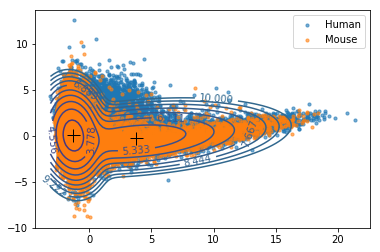

In [1]:
%matplotlib inline
execfile('plots.py')
X = np.loadtxt('results/Mouse_Human/Mouse_Human_dense_allgenes_repPCA.txt',delimiter='\t')
metadata_file = 'results/Mouse_Human/Mouse_Human_allgenes_metadata.tsv'
num_clusters = 2
plot_bygroup(X,metadata_file,num_clusters)

# Representation Space Clusters

Here, we simply project the representation vectors obtained from model training onto a lower-dimensional space using one of the dimensionality reduction algorithms (i.e. PCA or tSNE). We use Tensorflow Project to execute these algorithms and visualize the projected data. We then identify "interesting" clusters that appear in our visusalizations and run gene set enrichment analysis on the genes that belong to these clusters.  

Functional Annotation Tool: DAVID  

Below are the results that we observed by using the Tensorflow Projector tool. Unfortunately, the tool has a few limitations. Firstly, when performing tSNE, it limits the number of points to 10,000, so in our larger datasets, we are unable to using this dimensionality reduction technique to observe clusters for a sizable proportion of our data. In addition, while the bounding box feature is great for identifying clusters that we observe with the human eye, when using the 3D visualization of our results, the bounding box only picks up the points that appear at the "front" of our visualization. Therefore, even if we can distinctly identify a cluster after the tSNE algorithm is stopped, it is difficult to capture the entire 3D structure. Nevertheless, we attempt to use these features to see if we the clusters that we identify from tSNE are meaningful with respect to enriched gene sets or functional annotations.  

In [5]:
from IPython.display import HTML, display
display(HTML("<tr><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenes.png'></td><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenesHumanCluster_funcAnnot.png'></td></tr>"))  

,


In [6]:
from IPython.display import HTML, display
display(HTML("<tr><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenesMouseHuman.png'></td></tr>"))  
display(HTML("<tr><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenes_MouseHuman_MouseCluster_funcAnnotClustering.png'></td><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenes_MouseHuman_MouseCluster_funcAnnot.png'></td></tr>"))  


""


,


In [7]:
display(HTML("<tr><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenesMouseHuman2.png'></td><td><img src='results/clustering/TFProjDAVID/DAVID_all10binAllGenes_MouseHuman_HumanCluster_funcAnnot.png'></td></tr>"))  

,


------
In order to combat the small data size issue with Tensorflow Projector, we seek to limit the number of genes that we include in our dataset for dimensionality reduction with tSNE. We obtain a list of annotated genes from the Gene Ontology website (Downloads -> Annotations) for Human (19,451 genes) and Mouse (24,492).  

**(CAN IGNORE THIS SECTION FOR NOW...SEE BELOW FOR WAYS WE WORKED AROUND THIS PROBLEM)**



In [1]:
import csv

def geneList(annotationFile):
    f = open(annotationFile,'r')
    reader = csv.reader(f,delimiter='\t')
    
    genes = []
    for line in reader:
        if len(line) > 2:
            genes.append(line[2])
    
    return(list(set(genes)))

In [2]:
mouse_genes = geneList('data/miscellaneous/annotMouse.txt')
human_genes = geneList('data/miscellaneous/annotHuman.txt')

In [ ]:
execfile('analysis.py')

all_genes = mouse_genes + human_genes
all_genes = [gene.lower() for gene in all_genes]

representation_file = 'results/all10bin/all10binBinary_model_repAllGenes.txt'
metadata_file = 'results/all10/all10_metadataAllGenes.tsv'
index_set = [2,3]
output_file = 'all10bin_MouseHumanAllGenes_Annot'
filterGenes(representation_file,metadata_file,index_set,all_genes,output_file)

-------

### Barnes-Hut tSNE

The Sci-Kit Learn implementation of tSNE required a considerable amount of memory to run and we were running into difficulties running the tSNE algorithm even with a small fraction of our original dataset. Fortunately, we stumbled upon a different implementation of tSNE called the Barnes-Hut tSNE which leads to a more interactive (i.e. more log information) and, more importantly, a faster and more efficient projection calculation. Details of the implementation that we used can be found on this GitHub page: https://github.com/dominiek/python-bhtsne.   


### R Shiny App for Clustering Analysis

Due to the limitations of Tensorflow Projector, we decided to craft a similar version of the projection tool using R Shiny. The most important features we wanted to include in this app were the ability to visualize our entire dataset. We also wanted to ensure that we could manually select different dimensions of the projected space to visualize and isolate points/clusters in these plots of interest. The R Shiny implementation has both bounding box and "lasso" selection tools for 2D plots in Plotly, so we take advantage of these features in our own implementation. In addition, we include a button in the app that can write to file the set of selected points chosen using the bounding box or lasso tool.  

We focused initially on the Mouse and Human clusters that we identified using the Tensorflow Projector with limited data. In order to more clearly isolate the Mouse cluster in the projection, we plot the 1st and 2nd dimensions of the tSNE projected data. For the Human cluster, we plot the 2nd and 3rd dimensions and filter out all values for which  the first dimension is less than 0. (We filter out points with these values for the Human cluster because our visualization of the data in 3D space indicates that the specific cluster we are interested in lies "overlaps" with another cluster when only looking through a 2D lense via the 2nd and 3rd dimensions.)  

In [6]:
from IPython.display import HTML, display
display(HTML("<tr><td><img src='results/clustering/RShiny/MouseHuman_MouseCluster.png'></td><td><img src='results/clustering/RShiny/MouseHuman_HumanCluster.png'></td></tr>"))  

,


After performing Barnes-Hut tSNE on the representation vectors for all Mouse and Human promoters and isolating the points of interest with our R Shiny app, we write the list of genes from the selected list to a file for easy copy-and-pasting into the enrichment analyses tools found online.  

In [1]:
execfile('analysis.py')

metadata_file = 'selectedPoints.txt'
index_set = [3]
output_file = 'selectedPointsHuman.txt'
filterSpeciesMetadataOnly(metadata_file,index_set,output_file)

metadata_file = 'selectedPoints.txt'
index_set = [2]
output_file = 'selectedPointsMouse.txt'
filterSpeciesMetadataOnly(metadata_file,index_set,output_file)

Using TensorFlow backend.


### PantherDB for GO Term Enrichment (Biological Process and Molecular Function

For this tool, all we need to do is copy and paste the list of gene names that we aggregated from the step above into Enrichment Analysis box on the front page of the Gene Ontology website.  

### DAVID: Functional Annotation Tool

Unfortunately, DAVID only supports 3000 genes in an inputted gene list due to server constraints. Therefore, in order to use this tool, we had to limit our set of genes to analyze. We use the output from the Gene Ontology website to identify the genes from our inputted lists that successfully mapped to annotations. We use this list of annotated genes to randomly select 3000 genes to be inputted into the DAVID tool.  

**Outputs for GO:** results/clustering/RShiny/GOterm    
**Outputs for DAVID:** results/clustering/RShiny/DAVIDfunc  


In [2]:
import csv

# get Human genes w/ annotations
f = open('results/clustering/RShiny/DAVIDfunc/pantherGeneListHuman.txt')
reader = csv.reader(f,delimiter='\t')
humanGenes = [line[1] for line in reader]
f.close()

# write new filtered list to file
f = open('results/clustering/RShiny/DAVIDfunc/pantherGeneListHuman_filtered.txt','w')
for gene in humanGenes[0:2900]:
    f.write(gene + '\n')
f.close()

In [3]:
import csv

# get Mouse genes w/ annotations
f = open('results/clustering/RShiny/DAVIDfunc/pantherGeneListMouse.txt')
reader = csv.reader(f,delimiter='\t')
humanGenes = [line[1] for line in reader]
f.close()

# write new filtered list to file
f = open('results/clustering/RShiny/DAVIDfunc/pantherGeneListMouse_filtered.txt','w')
for gene in humanGenes[0:2900]:
    f.write(gene + '\n')
f.close()